In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in lpa)')

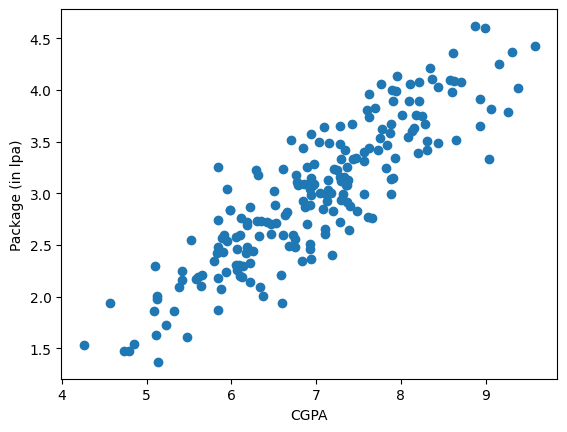

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [ ]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [ ]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [ ]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [ ]:
y_test

,package
95,2.79
15,3.23
30,3.26
158,3.04
128,3.34
115,4.21
69,2.94
170,2.87
174,2.99
45,3.58


In [ ]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.13635249])

Text(0, 0.5, 'Package (in lpa)')

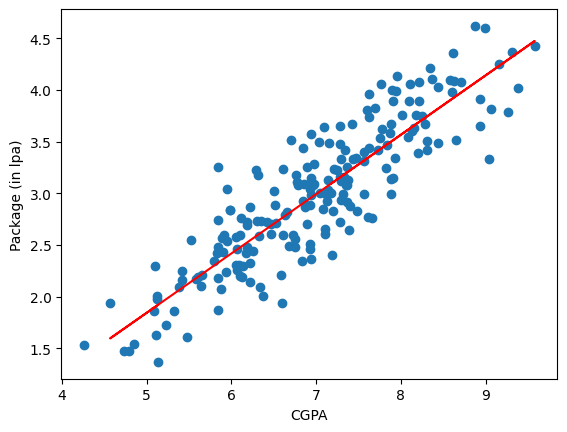

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [ ]:
m = lr.coef_

In [ ]:
m

array([0.57425647])

In [ ]:
b = lr.intercept_

In [ ]:
b

-1.0270069374542108

##y = m*x + b

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
lr.predict(X_test)

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [ ]:
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [ ]:
print("MAE", mean_absolute_error(y_test, y_pred))

MAE 0.23150985393278373


In [ ]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.08417638361329656


In [ ]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.2901316659954521


In [ ]:
print("R2_Score", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2_Score 0.7730984312051673


In [ ]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [ ]:
1 - ((1 - r2)*(40 -1)/(40 - 1 -1))

0.7671273372895138

In [ ]:
class MeraLinearRegression:
  def __init__(self):
    self.m = None
    self.b = None

  def fit(self, X_train, y_train):
    num = 0
    den = 0

    for i in range(X_train.shape[0]):
      num = num + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
      den = den + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))

    self.m = num / den
    self.b = y_train.mean() - (self.m * X_train.mean())
    print(self.m)
    print(self.b)

  def predict(self, X_test):
    return self.m * X_test + self.b

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [ ]:
X

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [ ]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(160,)

In [ ]:
lr = MeraLinearRegression()

In [ ]:
lr.fit(X_train, y_train)

0.5742564727019197
-1.0270069374542108


In [ ]:
X_train[0]

7.18

In [ ]:
X_train.mean()

7.005375000000001

In [ ]:
X_test[0]

6.63

In [ ]:
lr.predict(X_test[0])

2.7803134765595168

In [ ]:
lr.predict()

TypeError: MeraLinearRegression.predict() missing 1 required positional argument: 'X_test'